# Comparing weather trends in Madrid and the world 
### by Micah Costello







For my Udacity project on weather trends, I decided to compare yearly average global temperatures with yearly average temperatures in Madrid, Spain. The data spans from 1750 to 2013. 

## STEP 1 : Extracting the data from SQL database

I used the following query to extract the data from Udacity's weather database :

            SELECT 
                    city_data.year,
                    city_data.avg_temp AS Madrid_avg_temp, 				
                    global_data.avg_temp AS global_avg_temp
                FROM city_data 
                LEFT JOIN 
                    global_data 
                    ON global_data.year = city_data.year 
                WHERE city = 'Madrid';

## STEP 2: Accessing and preparing the data

To access the .csv file and prepare the data, I used Python's Pandas library. Given that there is no global temperature data in the database from before the year 1750, and that the data for Madrid for those years has some NaN values, I decided to drop all the rows from before that year.

In [22]:
import pandas as pd
df = pd.read_csv('mad_global_temps.csv')
drop_indices = range(7)
df.drop(drop_indices, axis = 0, inplace = True)
df.reset_index(inplace = True,drop = True)

In [23]:
df.head()

,year,madrid_avg_temp,global_avg_temp
0,1750,12.01,8.72
1,1751,12.71,7.98
2,1752,7.07,5.78
3,1753,11.47,8.39
4,1754,11.49,8.47


## STEP 3: Finding the moving average

To find the moving average, I used Pandas' ".rolling" method, opting for a period of 10 years to smooth out the lines and make the trends more visible.


In [48]:
df['madrid_MA'] = df['madrid_avg_temp'].rolling(10).mean()
df['global_MA'] = df['global_avg_temp'].rolling(10).mean()

## STEP 4: Visualizing the data

I created a line chart for the data using Python's Matplotlib library. Both of the lines are on the same graph to facilitate comparison. 

In [49]:
import matplotlib.pyplot as plt

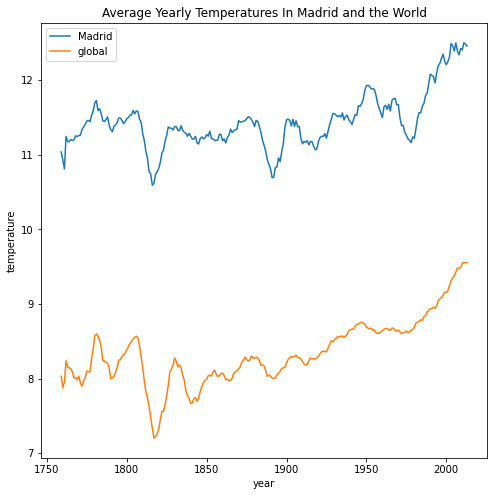

In [53]:
x = df['year']
y1 = df['madrid_MA']
y2 = df['global_MA']
plt.figure(figsize = (8,8))
plt.plot(x,y1)
plt.plot(x,y2)

plt.title('Average Yearly Temperatures In Madrid and the World')
plt.xlabel('year')
plt.ylabel('temperature')
plt.legend(['Madrid','global'])
plt.show()

## STEP 5: Observations

1. The average yearly temperature in Madrid is consistently around 3 degrees higher than the global yearly average temperature. 

2. The changes in the yearly average in Madrid seem to be more erratic than those of the global yearly average. This may be because the global average is already an average of averages, and its line chart is therefore smoother. 

3. Despite observation #2, the crests and troughs in Madrid's data do appear to correspond to those of the global data. What happens to tempratures globally is reflected in Madrid. 

4. In both lines, there is a trend of increasing temperatures. Globally, the trend seems to take off around the middle of the 19th century, and in Madrid, around the beginning of the 20th century. The trend is more evident and consistent in the global data line.